### Unsupervised Machine Learning - Clustering using K-Means
K-Means clustering is an unsupervised learning technique that is suitable for working with unlabelled data that lacks predefined categories or groups. The primary objective of this segment is to group similar data points together, with the number of groups determined by the value of K. The algorithm follows an iterative approach and assigns each data point to one of the K groups based on the features that are provided.

In [5]:
# Data Analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries and evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("..\Customer_Segmentation\Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

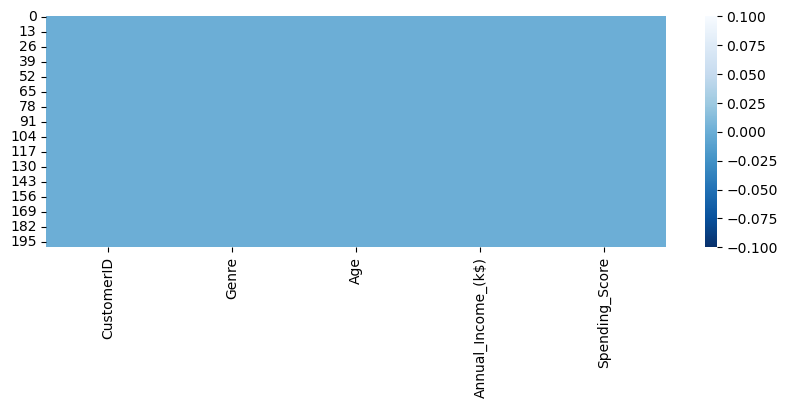

In [13]:
# Check for missing values
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

### Data Cleaning and Pre-Processing

In [14]:
# Check for duplicates
print(df.duplicated().sum())

0


### Exploratory Data Analysis
- Univariate
- Bivariate
- Multivariate

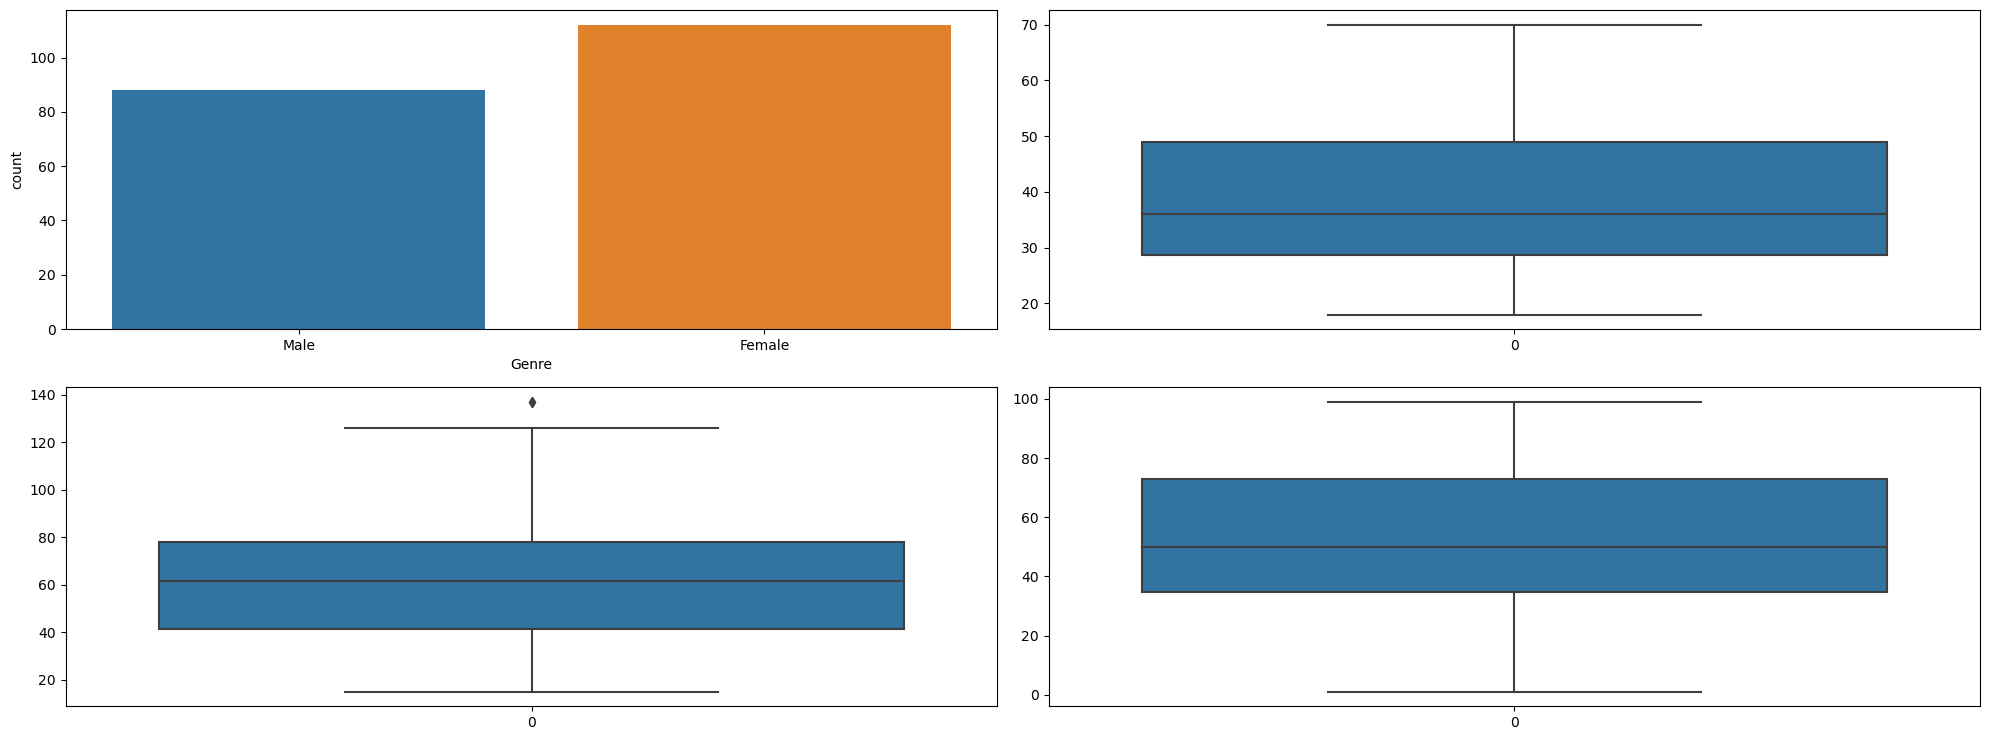

In [20]:
fig, axs = plt.subplots(2,2,figsize=(20,7.5))
plt1 = sns.countplot(x=df['Genre'], ax=axs[0,0])
plt2 = sns.boxplot(df['Age'], ax=axs[0,1])
plt3 = sns.boxplot(df['Annual_Income_(k$)'], ax=axs[1,0])
plt4 = sns.boxplot(df['Spending_Score'], ax=axs[1,1])

plt.tight_layout()

### Model Building

In [22]:
# Label encoder - converts categorical data into numerical i.e. Genre from Male to 1
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # Method initialization

# Looping for Columns except Survived
for x in df.columns[1:]:
    if(df[x].dtype=='object'):
        df[x] = encoder.fit_transform(df[x])
    else:
        df[x] = df[x]

df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [23]:
# Remove CustomerID column
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


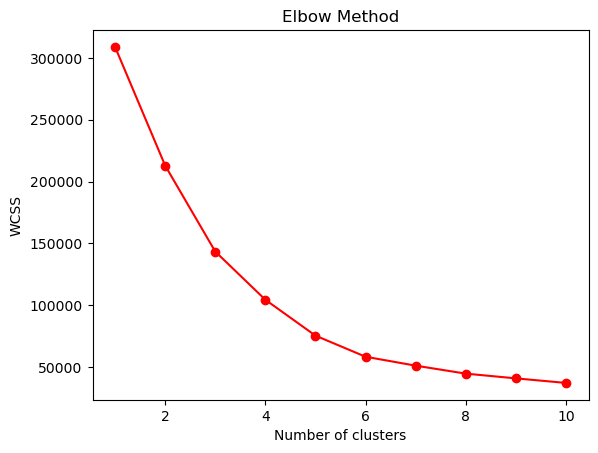

In [24]:
# Determine optimal number of clusters - wcss - within cluster sum of squares
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()